# python script to extract plastic manufacturers in West Bengal from JustDial website and compile it in a single excel file.

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time


service = Service(ChromeDriverManager().install())
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=options)


driver.get('https://www.justdial.com/Kolkata/Plastic-Manufacturers/nct-10375786?trkid=2634849-kolkata')


time.sleep(5)


storeDetails = driver.find_elements("class name", 'resultbox')


nameList = []
addressList = []
ratingList = []


for store in storeDetails:
    try:
        name = store.find_element("class name", 'resultbox_title_anchor').text
        address = store.find_element("class name", 'font15').text
        rating = store.find_element("class name", 'resultbox_totalrate').text
        
        nameList.append(name)
        addressList.append(address)
        ratingList.append(rating)
    except Exception as e:
        print(f"Error extracting details: {e}")


data = {
    'Company Name': nameList,
    'Address': addressList,
    'Rating': ratingList
}
df = pd.DataFrame(data)


df.to_excel('plasticmanufacturerskolkata.xlsx', index=False)


driver.quit()


# visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

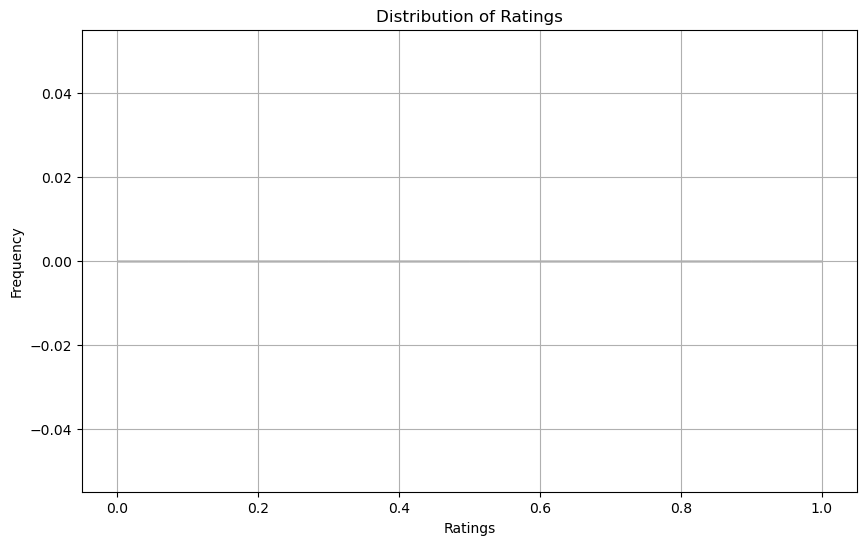

In [4]:
# Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

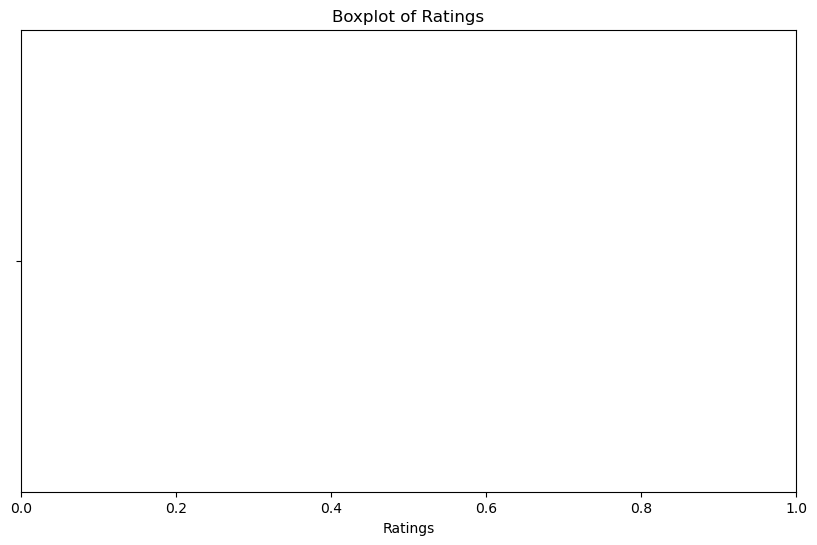

In [5]:
# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rating')
plt.title('Boxplot of Ratings')
plt.xlabel('Ratings')
plt.show()


In [6]:
# Plotting using plotly
fig = px.bar(df, x='Company Name', y='Rating', title='Company Ratings', labels={'Rating':'Ratings', 'Company Name':'Company Name'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [7]:
import pandas as pd

# Creating the DataFrame from the provided data
data = {
    'Company Name': [
        'Tirupati Traders', 'Paras Plastics Industries', 'Pratham Flexo', 'Shiv Plastic Industries',
        'Sree Matha Industries', 'B H Plastic Industries', 'Plastochem India Pvt Ltd',
        'Asl Plastic Pvt Ltd (Corporate Office)', 'Super Plast Industries', 'Plastic Products'
    ],
    'Address': [
        'Ali Street Chittaranjan Avenue, Kolkata', 'Amartalla Street Lal Bazar, Kolkata',
        'Warehouse Campus Kabir Colony, Alwar', '32/5 Mhow Road, Ratlam',
        'Industrial Estate Mahadevapura, Bangalore', 'Km Road Uddeboranahalli, Chikmagalur',
        'Sech Bhawan, Kolkata', 'Chittaranjan Avenue, Kolkata', 
        'Sarani Chittaranjan Avenue, Kolkata', 'NETAJI SUBHAS ROAD. Kolkata GPO, Kolkata'
    ],
    'Rating': [4.3, 4.0, 4.2, 4.4, 4.1, 4.2, 3.1, 4.1, 3.9, 3.8]
}

df = pd.DataFrame(data)

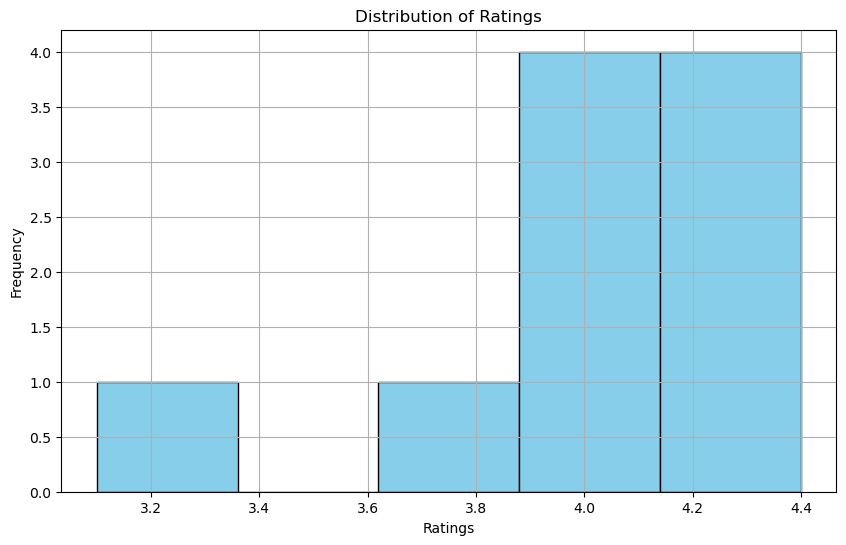

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

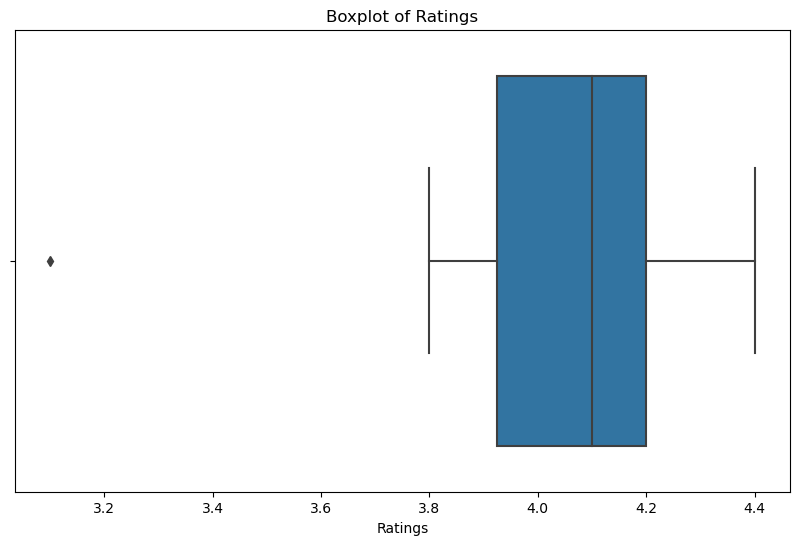

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rating')
plt.title('Boxplot of Ratings')
plt.xlabel('Ratings')
plt.show()


In [10]:
import plotly.express as px

fig = px.bar(df, x='Company Name', y='Rating', title='Company Ratings', labels={'Rating':'Ratings', 'Company Name':'Company Name'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()


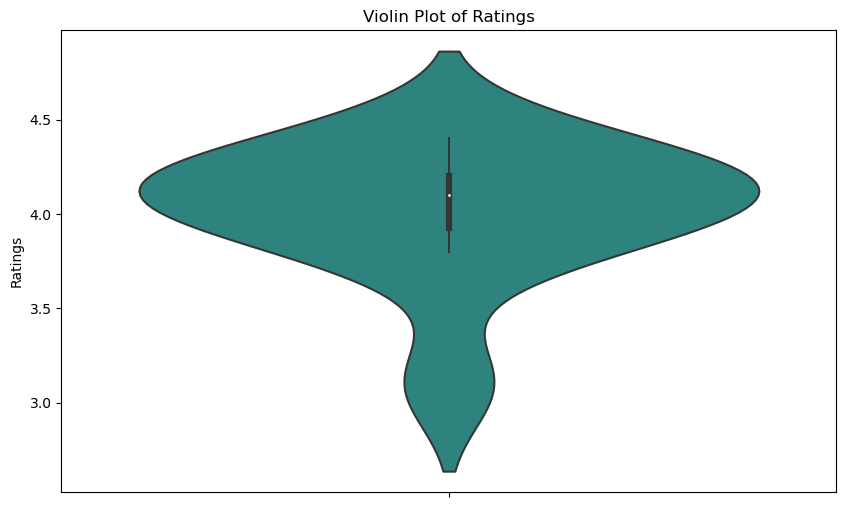

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, y='Rating', palette='viridis')
plt.title('Violin Plot of Ratings')
plt.ylabel('Ratings')
plt.show()


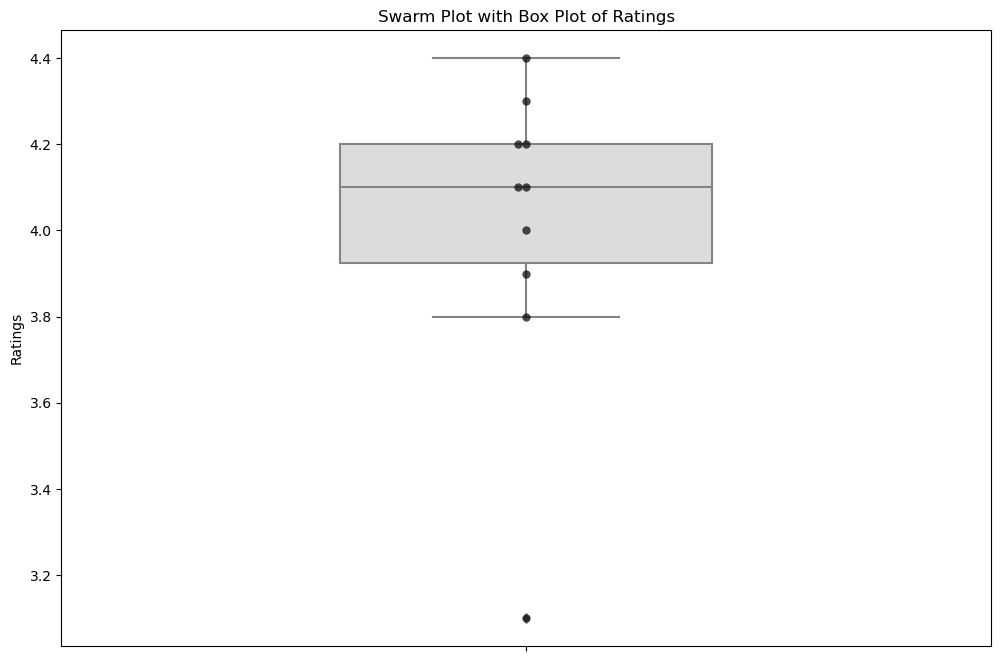

In [12]:
# Seaborn Swarm Plot with Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Rating', palette='coolwarm', width=0.4)
sns.swarmplot(data=df, y='Rating', color='black', size=6, alpha=0.7)
plt.title('Swarm Plot with Box Plot of Ratings')
plt.ylabel('Ratings')
plt.show()


In [13]:
import plotly.graph_objects as go

# Create a sunburst chart
fig = go.Figure(go.Sunburst(
    labels=df['Company Name'],
    parents=[""] * len(df),
    values=df['Rating'],
    branchvalues="total",
))
fig.update_layout(title='Sunburst Chart of Ratings by Company')
fig.show()


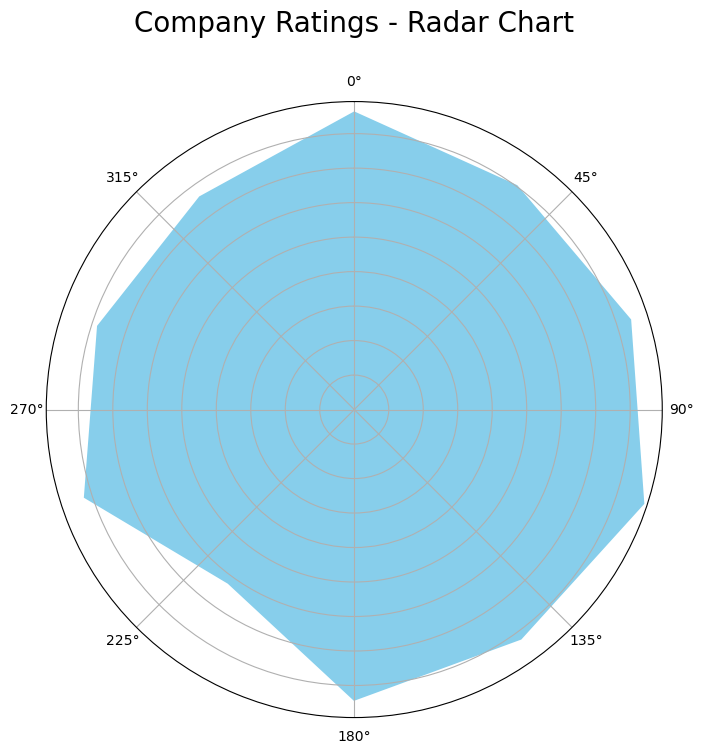

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for radar chart
categories = df['Company Name']
values = df['Rating'].values

# Number of variables
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Complete the loop
values = np.concatenate((values,[values[0]]))
angles += angles[:1]

# Plotting
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', linewidth=2, linestyle='solid')
ax.set_yticklabels([])
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.title('Company Ratings - Radar Chart', size=20, y=1.1)
ax.grid(True)

plt.show()


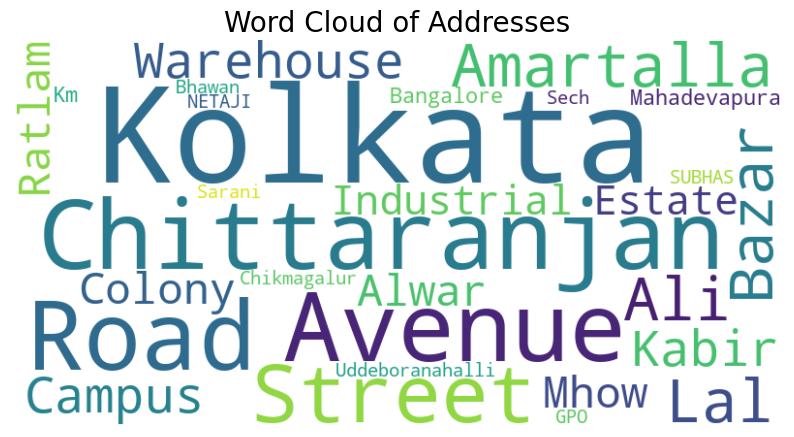

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all addresses into a single string
text = ' '.join(df['Address'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Addresses', size=20)
plt.show()


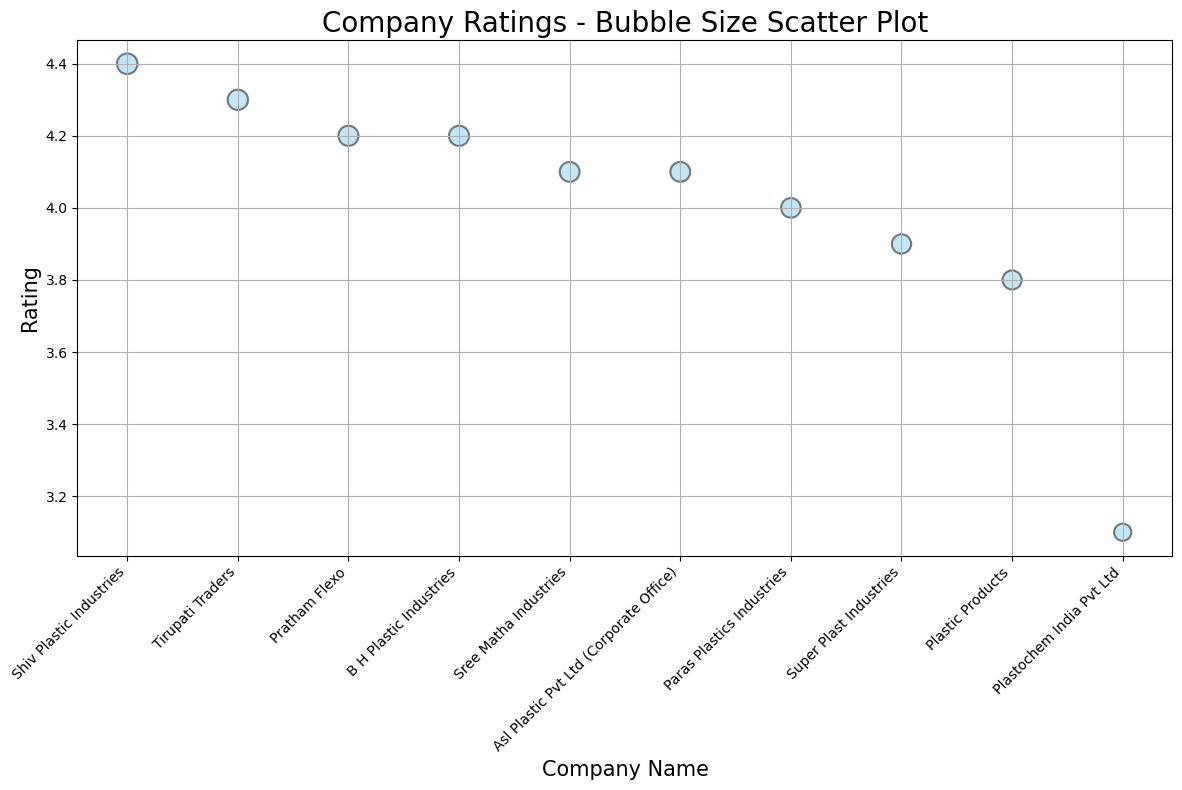

In [19]:
import matplotlib.pyplot as plt

# Sort DataFrame by Rating for better visualization
df_sorted = df.sort_values(by='Rating', ascending=False)

plt.figure(figsize=(12, 8))
plt.scatter(df_sorted['Company Name'], df_sorted['Rating'], s=df_sorted['Rating']*50, alpha=0.5, c='skyblue', edgecolors='black', linewidth=1.5)

# Adding labels and title
plt.title('Company Ratings - Bubble Size Scatter Plot', size=20)
plt.xlabel('Company Name', size=15)
plt.ylabel('Rating', size=15)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

plt.show()


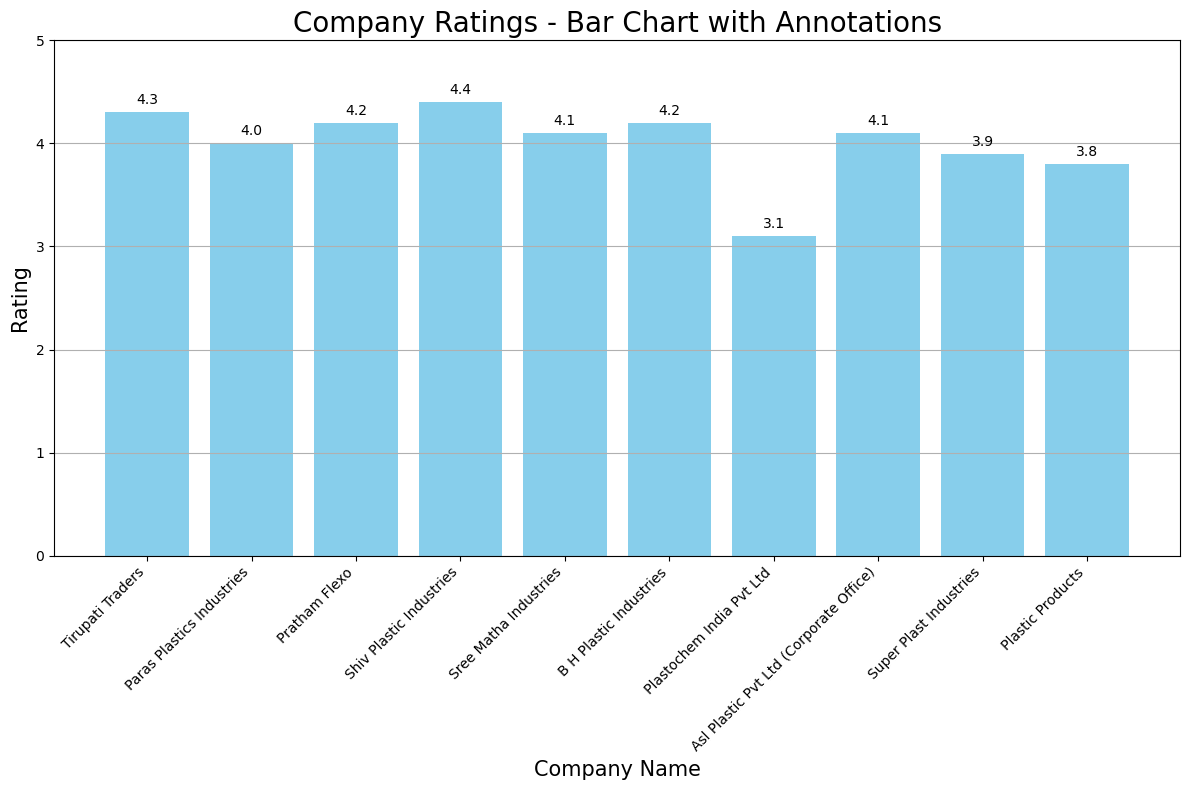

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
bars = plt.bar(df['Company Name'], df['Rating'], color='skyblue')

# Adding annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 1), ha='center', va='bottom', fontsize=10)

# Adding labels and title
plt.title('Company Ratings - Bar Chart with Annotations', size=20)
plt.xlabel('Company Name', size=15)
plt.ylabel('Rating', size=15)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


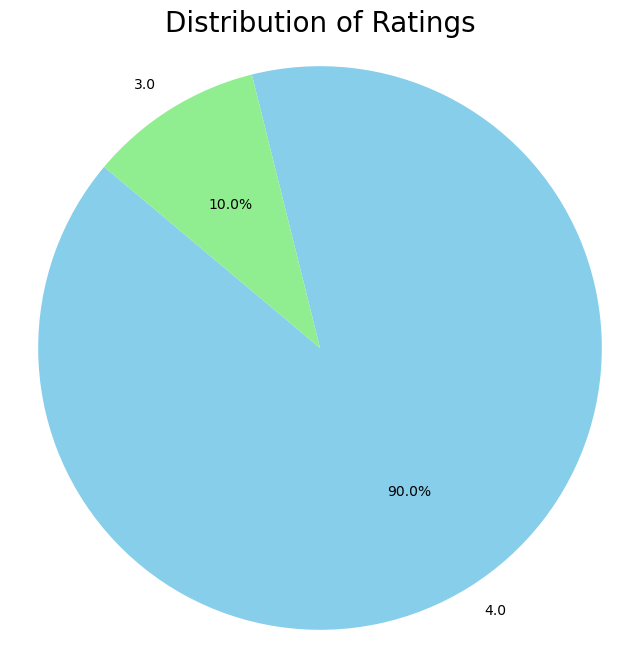

In [21]:
import matplotlib.pyplot as plt

# Round ratings to nearest integer for simplicity
df['Rating_rounded'] = df['Rating'].round()

# Count ratings
rating_counts = df['Rating_rounded'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Ratings', size=20)
plt.axis('equal')
plt.show()


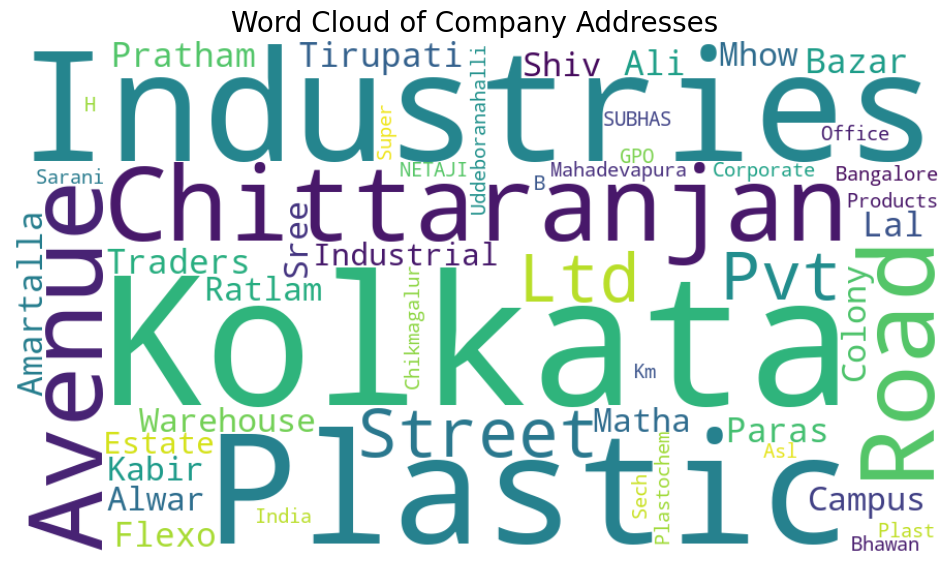

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate addresses with company names into a single string
text = ' '.join(df.apply(lambda x: f"{x['Company Name']} {x['Address']}", axis=1))

# Generate word cloud
wordcloud = WordCloud(width=900, height=500, background_color='white').generate(text)

# Display word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Company Addresses', size=20)
plt.show()


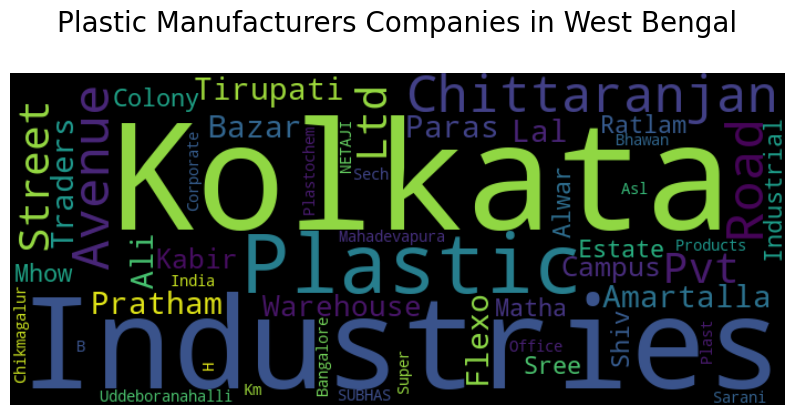

In [97]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate addresses with company names into a single string
text = ' '.join(df.apply(lambda x: f"{x['Company Name']} {x['Address']}\n\n", axis=1))

# Generate word cloud with emphasis on top addresses
wordcloud = WordCloud(width=700, height=300, background_color='black',
                      max_words=50, prefer_horizontal=0.7).generate(text)

# Display word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Plastic Manufacturers Companies in West Bengal', size=20, pad=30)
plt.show()

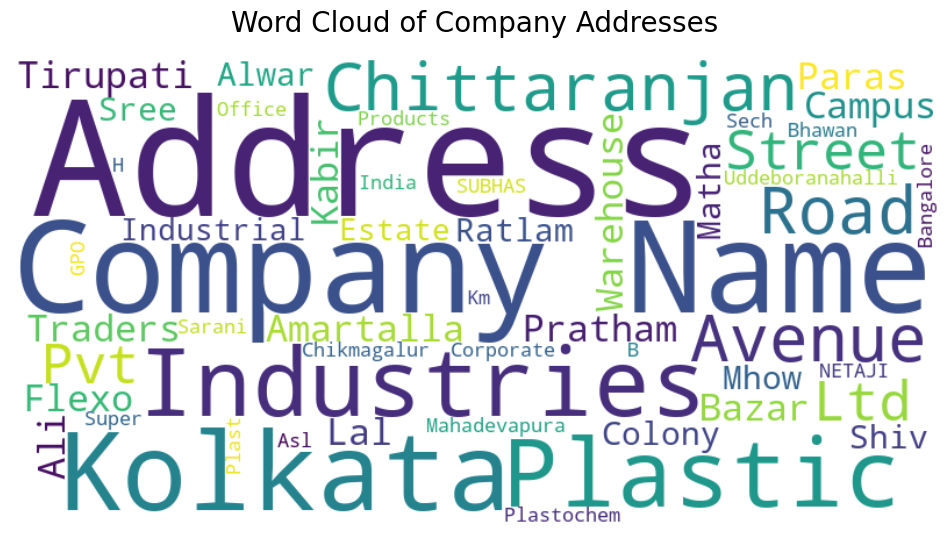

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate addresses with company names into a single string with appropriate spacing
text = '\n'.join(df.apply(lambda x: f"Company Name: {x['Company Name']}\nAddress: {x['Address']}\n\n", axis=1))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display word cloud with adjusted spacing
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Company Addresses', size=20, pad=20)  # Adjust title padding
plt.show()
